In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
df=pd.read_csv("spam.csv",encoding="latin1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True,axis=1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [7]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df["target"]=encoder.fit_transform(df["target"])

In [9]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


## MIsing ans duplicates

In [10]:
df.isna().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
df.shape

(5572, 2)

In [13]:
df.drop_duplicates(keep="first",inplace=True)

In [14]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [15]:
df.shape

(5169, 2)

## EDA

In [16]:
df["target"].value_counts() 

target
0    4516
1     653
Name: count, dtype: int64

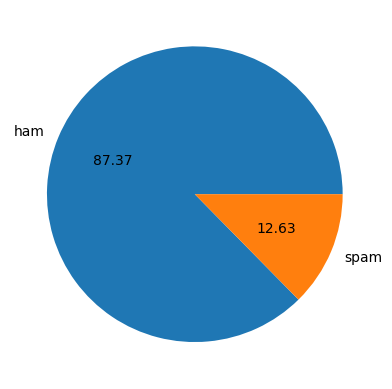

In [17]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [18]:
import nltk

In [124]:
df["num_of_char"]=df["text"].apply(len)

In [125]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [126]:
df["num_of_word"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [127]:
df["num_of_sent"]=df["text"].apply(lambda s:len(nltk.sent_tokenize(s)))

In [128]:
df.head(3)

,target,text,num_of_char,num_of_word,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


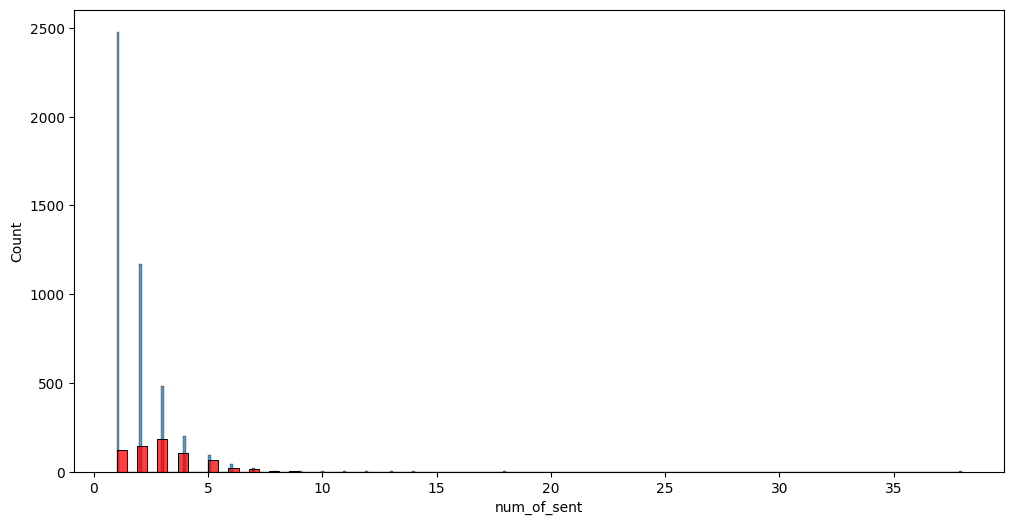

In [129]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_of_sent"])
sns.histplot(df[df["target"]==1]["num_of_sent"],color="red")
plt.show()

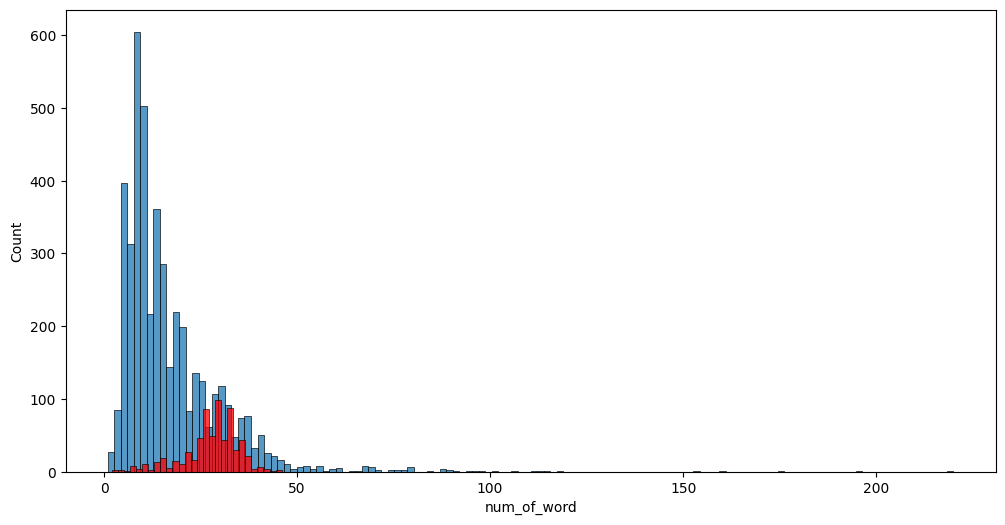

In [130]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_of_word"])
sns.histplot(df[df["target"]==1]["num_of_word"],color="red")
plt.show()

In [131]:
df.columns

Index(['target', 'text', 'num_of_char', 'num_of_word', 'num_of_sent'], dtype='object')

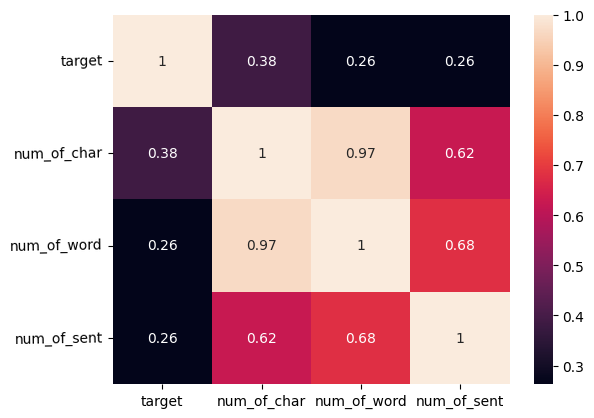

In [132]:
sns.heatmap(df[['target','num_of_char', 'num_of_word', 'num_of_sent']].corr(),annot=True)
plt.yticks(rotation=1)
plt.show()

## Extract Feature From Text

In [133]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
from nltk.corpus import stopwords
stopwords.words("english")[:4]

['i', 'me', 'my', 'myself']

In [135]:
from nltk.stem import PorterStemmer

def transform(text):

    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for word in text:
        if word.isalnum():
            y.append(word)

    text=y[:]
    y.clear()

    stop_words = set(stopwords.words("english"))
    punctuation = set(string.punctuation)

    for word in text:
        if word not in stop_words and word not in punctuation:
            y.append(word)

    text=y[:]
    y.clear()

    ps=PorterStemmer()
    for word in text:
        y.append(ps.stem(word))

    return " ".join(y)

In [136]:
print(transform("How Are aryan?? how is the temperature 88 or 777 and i am playing"))

aryan temperatur 88 777 play


In [137]:
from nltk.corpus import stopwords
stopwords.words("english")[:4]

['i', 'me', 'my', 'myself']

In [138]:
df["transformed_text"]=df["text"].apply(lambda sms:transform(sms))

In [139]:
df.head()

,target,text,num_of_char,num_of_word,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## ML

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3300)

X=tfidf.fit_transform(df["transformed_text"]).toarray()
y=df["target"].values

In [146]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=3)

In [147]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

models={
    "guass":GaussianNB(),
    "bernouli":BernoulliNB(),
    "multi":MultinomialNB()
}

In [148]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

def perform(true,pred):
    print(f"accuracy score  -->",{accuracy_score(true,pred)})
    print(f"precisoin score -->",{precision_score(true,pred)})
    print(confusion_matrix(true,pred))
    print("--"*25)

In [149]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"for {name} the performance is")
    perform(y_test,y_pred)

for guass the performance is
accuracy score  --> {0.8677494199535963}
precisoin score --> {0.5183946488294314}
[[967 144]
 [ 27 155]]
--------------------------------------------------
for bernouli the performance is
accuracy score  --> {0.9783449342614076}
precisoin score --> {0.98125}
[[1108    3]
 [  25  157]]
--------------------------------------------------
for multi the performance is
accuracy score  --> {0.9698375870069605}
precisoin score --> {1.0}
[[1111    0]
 [  39  143]]
--------------------------------------------------


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

bnb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 10.0],
    'binarize': [0.0, 0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]
}

mnb={
    'alpha': [0.1, 0.5, 1.0, 2.0, 10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]
}

options=[
    ["bernoulli naive bayes",BernoulliNB(),bnb],
    ["multi",MultinomialNB(),mnb]
]

In [151]:
for name,model,param in options:

  grid=GridSearchCV(estimator=model,param_grid=param,cv=5,verbose=1,n_jobs=-1)

  grid.fit(X_train,y_train)
  y_pred=grid.predict(X_test)

  print(f"for {name}")
  print(grid.best_params_)
  perform(y_test,y_pred)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
for bernoulli naive bayes
{'alpha': 0.1, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}
accuracy score  --> {0.9845320959010054}
precisoin score --> {0.9939024390243902}
[[1110    1]
 [  19  163]]
--------------------------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
for multi
{'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
accuracy score  --> {0.9783449342614076}
precisoin score --> {0.9583333333333334}
[[1104    7]
 [  21  161]]
--------------------------------------------------


In [152]:
final_model=BernoulliNB(alpha=0.1,binarize=0.0,class_prior=None,fit_prior=True)

In [153]:
final_model.fit(X_train,y_train)

BernoulliNB(alpha=0.1)

In [154]:
y_pred=final_model.predict(X_test)
perform(y_test,y_pred)

accuracy score  --> {0.9845320959010054}
precisoin score --> {0.9939024390243902}
[[1110    1]
 [  19  163]]
--------------------------------------------------


In [155]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(final_model,open("model.pkl","wb"))